# Instructor Task
## Dataset
- [Here](https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv) is the dataset.
- [Here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) is a description of the data. Ignore column 0 as it is merely the ID of a patient record.

## 1. Read in the data

In [1]:
import pandas as pd
df = pd.read_csv("breast-cancer.csv", header = None, index_col = 0)
df.rename(columns={1:'label'}, inplace=True)

In [2]:
df.head()

,label,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2. Separate the data into feature and target.

In [3]:
feature_cols = range(2,32)
target_cols = 'label'
features_df = df[feature_cols]
target_df = df[target_cols]
target_df.head()

0
842302      M
842517      M
84300903    M
84348301    M
84358402    M
Name: label, dtype: object

## 3. Create and evaluate using cross_val_score and 5 folds.
- What is the mean accuracy?
- What is the standard deviation of accuracy?

In [4]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
#X_tr, X_te, y_tr, y_te = cross_validation.train_test_split(features_df, target_df, test_size=0.2, random_state=0)
kfold_total = cross_validation.KFold(len(features_df), n_folds=5, indices=False, shuffle=True, random_state=5)
lr = LogisticRegression()


/Users/vijayhareesh/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:69: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


In [5]:
scores = cross_validation.cross_val_score(lr, features_df, target_df, cv=kfold_total, n_jobs=1)
print "Mean Accuracy : " + str(scores.mean())
print "Standard Deviation of Accuracy : " + str(scores.std())

Mean Accuracy : 0.950721937587
Standard Deviation of Accuracy : 0.0288235059324


## 4. Get a classification report to identify type 1, type 2 errors.
- Use train_test_split to run your model once, with a test size of 0.33
- Make predictions on the test set
- Compare the predictions to the answers to determine the classification report

In [6]:
from sklearn.metrics import confusion_matrix
X_tr, X_te, y_tr, y_te = cross_validation.train_test_split(features_df, target_df, test_size=0.33, random_state=5)
lr.fit(features_df,target_df)
predicted_y = lr.predict(X_te)
expected_y = y_te
print confusion_matrix(expected_y,predicted_y, labels = ["B", "M"])

[[121   1]
 [  2  64]]


* Accuracy : How often does the classifier predict correctly
= 121+64/188 = 98.40%

* Precision : How often does it predict Malignancy correctly
= 64/65 = 98.46%

* Recall : When it's actually malignant how often does our classifier predict it?
= 64/64+2 = 96.96%

* Type 1 error (False positive): 
i.e., when it is actually benign but it predicts malignant
= 1/122 = 0.81%

* Type 2 error (False negative):
i.e., when it is actually malignant but it predicts benign
= 2/66 = 3.03%

## 5. Scale the data and see if that improves the score.

In [7]:
from sklearn import preprocessing
scaled_features = preprocessing.scale(features_df)
X_tr, X_te, y_tr, y_te = cross_validation.train_test_split(scaled_features, target_df, test_size=0.33, random_state=5)
lr.fit(scaled_features,target_df)
predicted_y = lr.predict(X_te)
expected_y = y_te
print confusion_matrix(expected_y,predicted_y, labels = ['B', 'M'])

[[122   0]
 [  2  64]]


* Accuracy : How often does the classifier predict correctly
= 122+64/188 = 98.93%

* Precision : How often does it predict Malignancy correctly
= 64/64 = 100%

* Recall : When it's actually malignant how often does our classifier predict it?
= 64/64+2 = 96.96%

* Type 1 error (False positive): 
i.e., when it is actually benign but it predicts malignant
= 0/122 = 0%

* Type 2 error (False negative):
i.e., when it is actually malignant but it predicts benign
= 2/66 = 3.03%

* We could actually say that it has eliminated the Type 1 error. However, the recall couldn't improved.

## 6. Tune the model using automated parametric grid search via LogisticRegressionCV. Explain your intution behind what is being tuned.

### Q: What should we do to prevent overfitting so our model generalizes well to the test data?

In order to prevent overfitting, we need to generalize the model. In order to do that, we have to focus on the parameters that we can tune in the model to regularize it. One such parameter we can tune in Logistic Regression is C and LogisticRegressionCV takes it as an array input to the parameter Cs. I have given a range of logspace values from 10^0 to 10^{0.1} since the lower the C value, the stronger is the regularisation

In [8]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
import numpy as np
lrgrid = GridSearchCV(estimator=LogisticRegressionCV(), param_grid=dict(Cs=[np.logspace(0,0.1,10)]), n_jobs=1)
[lrgrid.fit(features_df.loc[train.tolist()],target_df.loc[train.tolist()]).score(features_df.loc[test.tolist()],target_df.loc[test.tolist()]) for train, test in kfold_total]

[0.97368421052631582,
 0.99122807017543857,
 0.92105263157894735,
 0.94736842105263153,
 0.92035398230088494]

### Q: What was the best C?

We use the automated GridSearchCV to find out the best C within the range that we have given as an input. We get the best C with the method best\_estimator\_.C\_ for LogisticRegressionCV. (for LogisticRegression it is just C without an '\_') 

In [9]:
print lrgrid.best_score_
print lrgrid.best_estimator_.C_

0.953947368421
[ 1.10775685]


In [10]:
cross_validation.cross_val_score(lrgrid, features_df, target_df, cv=kfold_total, n_jobs=1)

array([ 0.97368421,  0.99122807,  0.92982456,  0.94736842,  0.92035398])

## 7. Create Two Plots that describe the data and discuss your results

We know that Visualisation of more than 3 dimensions is impossible and thus, I have applied PCA on the dataframe to find the principal components and have plotted the major axes obtained from the PCA

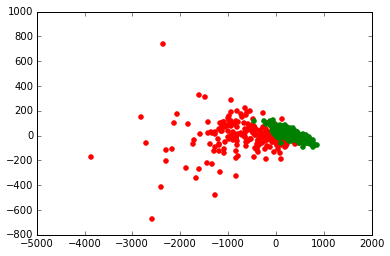

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(features_df)
pca_df = pd.DataFrame(pca.transform(features_df), index = df.index)
label_df = pd.DataFrame(target_df)
new_df = pd.concat([label_df,pca_df], axis=1)
#new_df

bx = plt.scatter(x = new_df[0][new_df['label']=='M'], y = new_df[1][new_df['label']=='M'], color='Red', label='Malignant')
bx = plt.scatter(x = new_df[0][new_df['label']=='B'], y = new_df[1][new_df['label']=='B'], color='green', label='Benign')

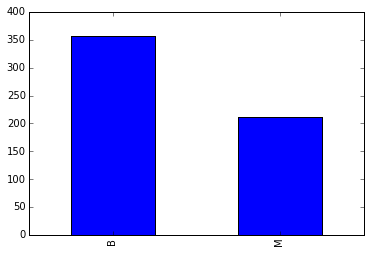

In [12]:
df['label'].value_counts().plot(kind='bar')

The above bar char gives us a simple intuition about the number of cases reported i.e., the patients with benign tumour are about 350 in number and Malignant are about 200 in number summing up to 550 which is close to 568, the total number of cases reported

## 8. Provide a one-sentence summary for a non-technical audience. Then provide a longer paragraph-length technical explanation.

Non Technical Audience :
* Our model definitely predicts all the patients who would be effected with Malignant tumour if they have but sometimes wrongly predicts even safe patients with malignant tumour

Technical Audience :
* The data that we have obtained is about 568 rows on which Logistic Regression was implemented on. However, the model obtained better results on scaling the data rather than direct application.
* The data also yielded better results before regularization rather than usual application. The C value has to be chosen accordingly though. Since I have followed an intuition on having the lower C value the better, I have given a range of 10^0 to 10^0.1 to gridsearch but could differ on different applications.
* The major visualisations were to have the number of patients reported and the features that define the final target but, having a multidimensional data in hand, I have implemented PCA to get the top two axes to visualise since it gives us the best possible intuition about the features
* There is obviously a tradeoff between a regularisation and the precision and accuracy. The more generalisation we want for the data, the lower would be the precision and accuracy that we obtain

References: 
* http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
* http://scikit-learn.org/stable/modules/model_evaluation.html
* https://randomforests.wordpress.com